## Introduction to Data Science

#### University of Redlands - DATA 101
#### Prof: Joanna Bieri [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
#### [Class Website: data101.joannabieri.com](https://joannabieri.com/data101.html)

---------------------------------------
# Homework Day 4
---------------------------------------

GOALS:

1. Answer all the questions from the lecture.
2. Practice making graphs with different types of data

----------------------------------------------------------

For this homework you will load the L data and practice making different kinds of plots!

This homework has **7 questions** from the lecture and **2 Problems** and a **Challenge**.

NOTE:
* Questions tend to be short answer or things were you change very minor parts of some given code.
* Problems tend to be more involved, like trying out our methods on a new column.
* Challenge problems are optional! They are intended to challenge you to reach beyond the basics of the class. I hope you will try the challenge problems!

Q. Write down a definition of these in your own words and give an example.

Structured Data- This is data that's super organized and fits neatly into tables, like in a spreadsheet or database. Think rows and columns, where everything has a specific place. Things like customer names, emails, or product prices.

Unstructured Data- This type of data is the opposite—it's messy and doesn't fit into a strict format. It's stuff like social media posts, videos, emails, or pictures. It doesn’t have a set structure, so it’s harder to analyze without special tools.

Semi-structured Data- it is a mix of both. It's kind of organized but not as neat as structured data. Think of it like an email: it has some parts that are predictable, like the sender and date (structured), but the body of the email is freeform (unstructured).



In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

### Load the Data

In [45]:
file_location = 'https://joannabieri.com/introdatascience/data/loans_full_schema.csv'
DF = pd.read_csv(file_location)

### Check Observations and Variables

**Q1** How many **observations** are there?

**Q2** How many **variables** are there?



In [43]:
# Enter your code here to find the data shape
DF.shape

(10000, 8)

**(Double CLick Here to answer the questions))**

Q1. there are 1000 oberservations(rows)

Q2. there are 8 variables(colloums)


### Reduce the number of variables

In [81]:
my_variables = ['loan_amount',
                'interest_rate',
                'term','grade',
                'state',
                'annual_income',
                'homeownership',
                'debt_to_income']

DF = DF[my_variables]

show(DF)

**Q3** Check out each of the variables (columns):

1. What does each column tell you? What are the units?
2. Is the data numerical? If so is it continuous or discrete?
3. If the categorical? If so is it ordinal or nominal?

<a href="https://www.openintro.org/data/index.php?data=loans_full_schema"> Here is a link to the full data description if you need to look up some of the column names.</a>

-----------------------------------------

**(Double Click Here)**

1.loan amount: The loan amount in dollars (USD).
interest_rate: The interest rate for the loan in percentage (%).
term: The duration of the loan in months (months).
grade: The credit grade (A, B, C, etc.)—categorical, no units.
state: The U.S. state of the borrower—categorical, no units.
annual income: The borrower’s annual income in dollars (USD).
homeownership: The homeownership status of the borrower (RENT, MORTGAGE, OWN)—categorical, no units.
debt to income: The ratio of debt to income as a percentage (%).

2.loan amount: Yes, numerica, discrete.
interest rate: Yes, numerical, continuous.
term: Yes, numerical, discrete.
grade: No, categorical.
state: No, categorical.
annual income: Yes, numerical, discrete.
homeownership: No, categorical.
debt to income: Yes, numerical, continuous.

3. grade: Ordinal (there is a meaningful order: A > B > C, etc.).
state: Nominal (no inherent order between states).
homeownership: Nominal (no inherent order between RENT, OWN, and MORTGAGE).

### Here is Example Code for a simple Histogram

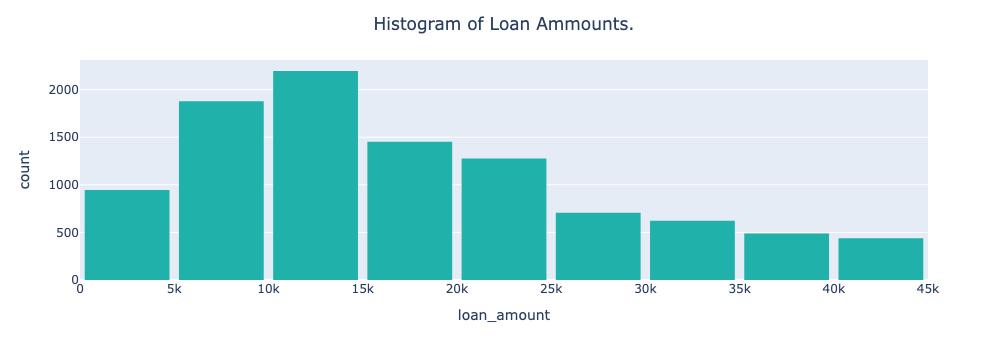

In [61]:
fig = px.histogram(DF,
                   nbins=10,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()


**Q4** You try changing the number of bins **nbins** what do you notice? Are there good choices? Bad choices?


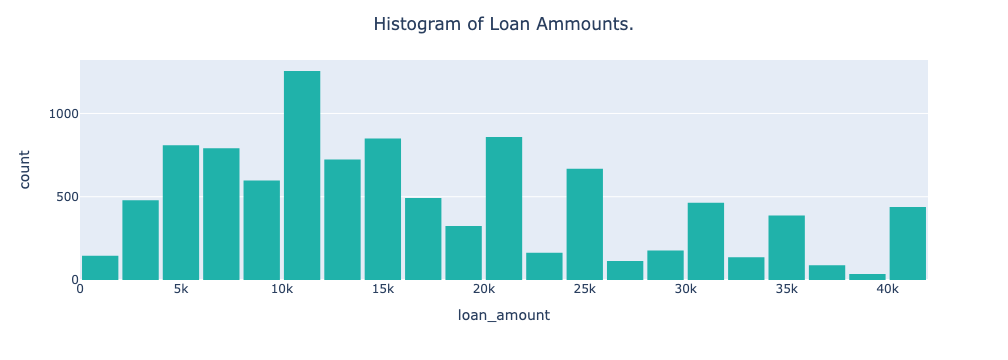

In [83]:
# Your code here (experiment here)
fig = px.histogram(DF,
                   nbins=30,
                   x='loan_amount',
                   color_discrete_sequence=['lightseagreen'])

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5)
fig.show()



**(Double Click here to answer the questions)**

Q4. if i change the number of nbins, it changes the amount of bins the loans are grouped in, so the more bins, the more groupings to get a more exact view of how many people are taking loans in that exact amount. going big is good since its more precise, but also much more content and its more confusing. with less its much more broad and simple but has a wide grouping

**Problem 1** Create a histogram of your own! Try making a histogram of one of the other pieces of numerical data. Make it as fancy as you want. Include some categorical information. Do you learn anything from your graph? If so what?


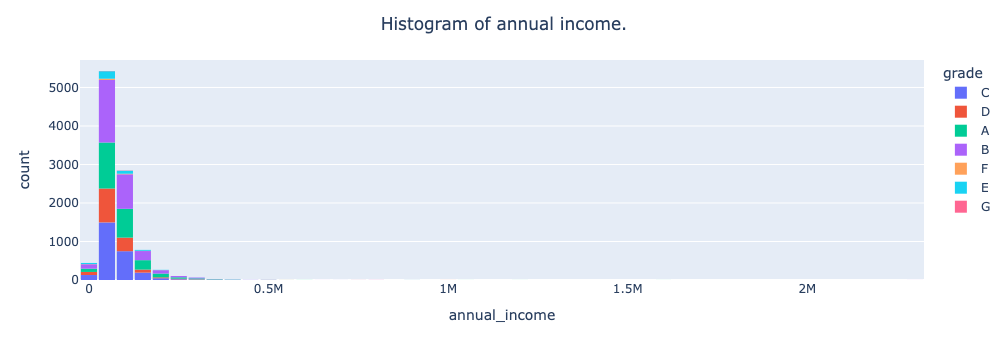

In [111]:
# Your code here
# Your code here (experiment here)
fig = px.histogram(DF,
                   nbins=100,
                   x='annual_income',
                   color='grade')

fig.update_layout(bargap=0.1,
                  title='Histogram of annual income.',
                  title_x=0.5)
fig.show()




### Here is example code for a histogram with a box plot included.

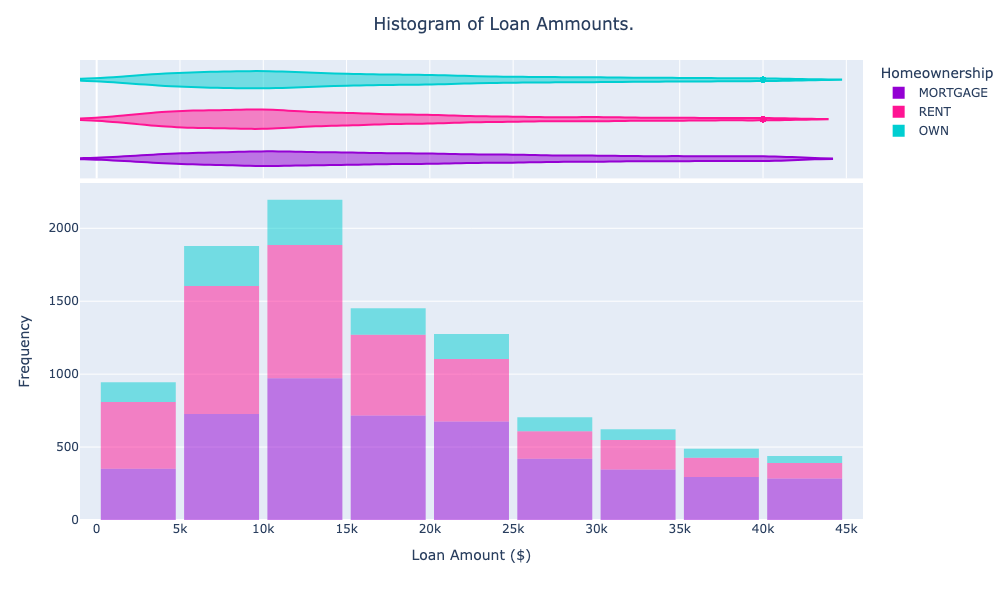

In [135]:
fig = px.histogram(DF,
                   nbins=9,
                   x='loan_amount',
                   color='homeownership',
                   opacity=0.5,
                   color_discrete_map={'MORTGAGE': 'darkviolet', 
                                       'RENT': 'deeppink', 
                                       'OWN': 'darkturquoise'},
                   marginal="violin"
                   )

fig.update_layout(bargap=0.1,
                  title='Histogram of Loan Ammounts.',
                  title_x=0.5,
                  xaxis={'range':[-1000, 46000]},
                  xaxis_title="Loan Amount ($)",
                  yaxis_title="Frequency",
                  legend_title="Homeownership",
                  autosize=False,
                  width=800,
                  height=600)
fig.show()

**Q5** Change the above plot to marginal="violin" and see what changes. Make some observations about the graph

**(Double Click Here)**
when changed, it makes a bit more of a fluid graph rather than before. it alo shows the density distribution whic the box did not do as well


In [125]:
counts = DF['homeownership'].value_counts()
show(counts)

**Q6** Copy and past the code above, but change it to get value counts for one of the other categorical columns

In [143]:
## Your code here
counts = DF['state'].value_counts()
show(counts)

### Here is example code for a bar plot

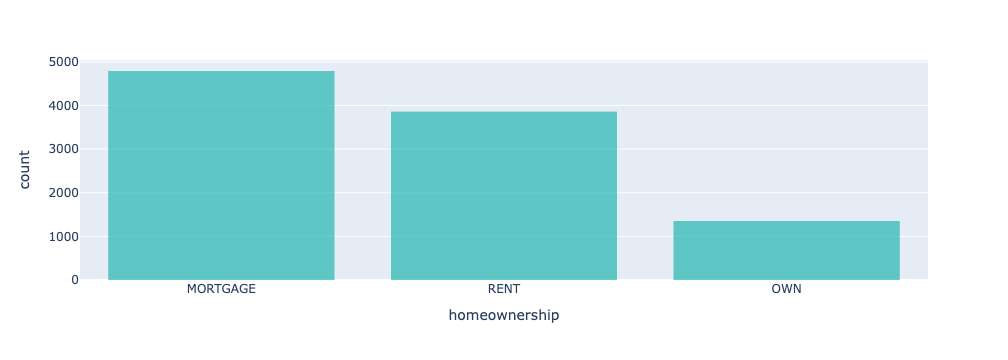

In [26]:
fig = px.bar(DF,
            x='homeownership',
            color_discrete_sequence=['lightseagreen'])
fig.update_traces(dict(marker_line_width=0))
fig.show()

**Q7** Can you figure out how to add x labels, y labels, and a title to this graph?

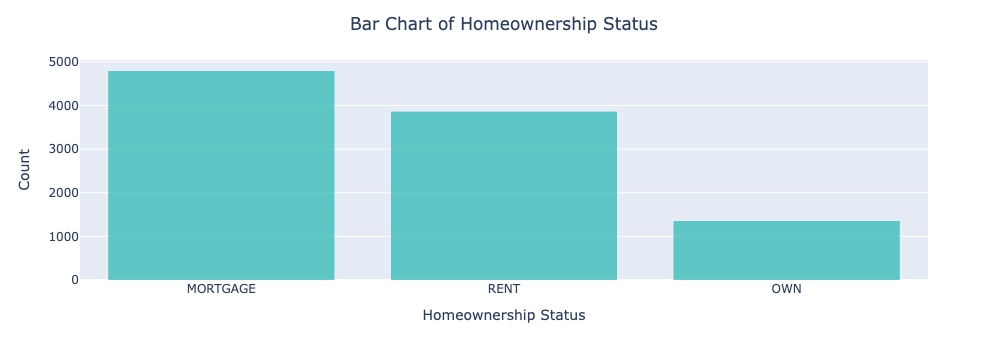

In [155]:
# Your code here
fig = px.bar(DF,
             x='homeownership',
             color_discrete_sequence=['lightseagreen'])


fig.update_layout(
    title='Bar Chart of Homeownership Status',  
    title_x=0.5, 
    xaxis_title="Homeownership Status",  
    yaxis_title="Count", 
)

fig.update_traces(dict(marker_line_width=0))
fig.show()



**Problem 2** Try to make your own bar plot of one of the other categorical columns. Add some categorical fill or facets. See how fancy you can make your graph. Make sure it is also still really informative.

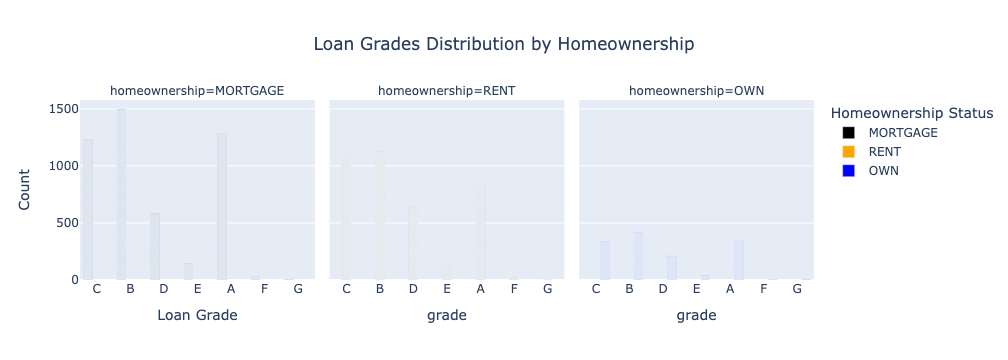

In [175]:
# Your code here


fig = px.bar(DF,
             x='grade',  
             color='homeownership', 
             barmode='group', 
             facet_col='homeownership',  
             color_discrete_map={'MORTGAGE': 'black', 'RENT': 'orange', 'OWN': 'blue'},
             title="Loan Grades Distribution by Homeownership")  


fig.update_layout(
    title_x=0.5,  
    xaxis_title="Loan Grade",  
    yaxis_title="Count", 
    legend_title="Homeownership Status",  
    
)

fig.show()



### Challenge:

Here is a data set that contains demographic data from the Behavioral Risk Factors Surveillance System from the CDC. It is a small subset of 60 observations.

Here is a link to the variable information:

<a href="https://www.openintro.org/data/index.php?data=cdc.samp" target="_blank">https://www.openintro.org/data/index.php?data=cdc.samp</a>

Your goal is to look at the columns and then make an graph from the data using what we learned in today's class.

In [183]:
file_location = 'https://joannabieri.com/introdatascience/data/cdc.samp.csv'
DF_new = pd.read_csv(file_location)
show(DF_new)
DF.shape

(10000, 8)

In [6]:
fig = px.bar(DF_new,
             x='genhlth',  # General health categories on the x-axis
             color='gender',  # Color the bars based on gender
             barmode='group',  # Group the bars by gender
             title="General Health Distribution by Gender",  # Add a title
             labels={'genhlth': 'General Health', 'count': 'Count'})  # Customize axis labels

# Update layout to make it more informative
fig.update_layout(
    title_x=0.5,  # Center the title
    xaxis_title="General Health Status",
    yaxis_title="Frequency",
    legend_title="Gender",
    autosize=False,
    width=800,
    height=600 
)


fig.show()

NameError: name 'px' is not defined